In [1]:
import pandas as pd
from sklearn.cluster import KMeans

iris = pd.read_csv('iris.csv')
x = iris.drop('target',axis=1)
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
#클러스터별 콜린스키 하바라츠 결과 비교
from sklearn.metrics import calinski_harabasz_score
for k in range(2,10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(x)
    labels = kmeans_model.labels_
    print("k : ",k,'score : ',calinski_harabasz_score(x,labels))

k :  2 score :  513.3038433517568
k :  3 score :  560.3999242466402
k :  4 score :  529.1207190840455
k :  5 score :  494.0943819140986
k :  6 score :  474.51742958716295
k :  7 score :  448.8714494416451
k :  8 score :  436.61302488142496
k :  9 score :  414.5303174051382


c:\Users\suhye\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


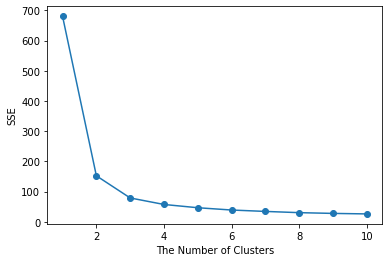

[680.8244, 152.36870647733906, 78.94084142614601, 57.34540931571816, 46.535582051282056, 38.95701115711986, 34.326529914529914, 30.227724598930486, 27.766706937799043, 26.07225182334006]


In [5]:
#엘보우기법
import matplotlib.pyplot as plt
def elbow(x):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
    
elbow(x)

In [7]:
#k=3

km = KMeans(n_clusters=3, random_state=1)
km.fit(x)

#할당된 군집을 iris데이터에 추가
new_labels = km.labels_
iris['cluster'] = new_labels

iris.groupby(['cluster']).mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


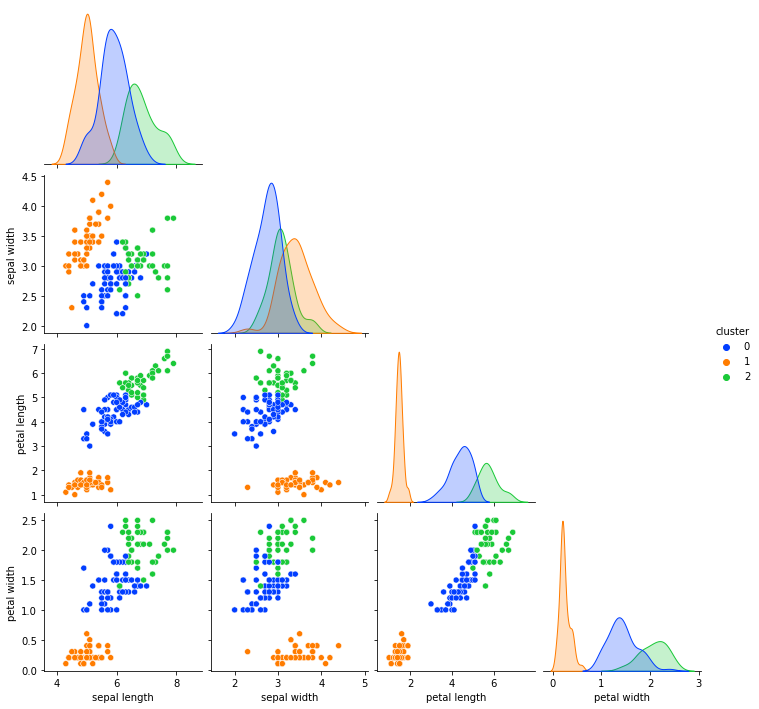

In [8]:
#시각화하여 군집별 특성 파악
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris,
             diag_kind='kde',
             hue = 'cluster',
             corner=True,
             palette='bright')

plt.show()

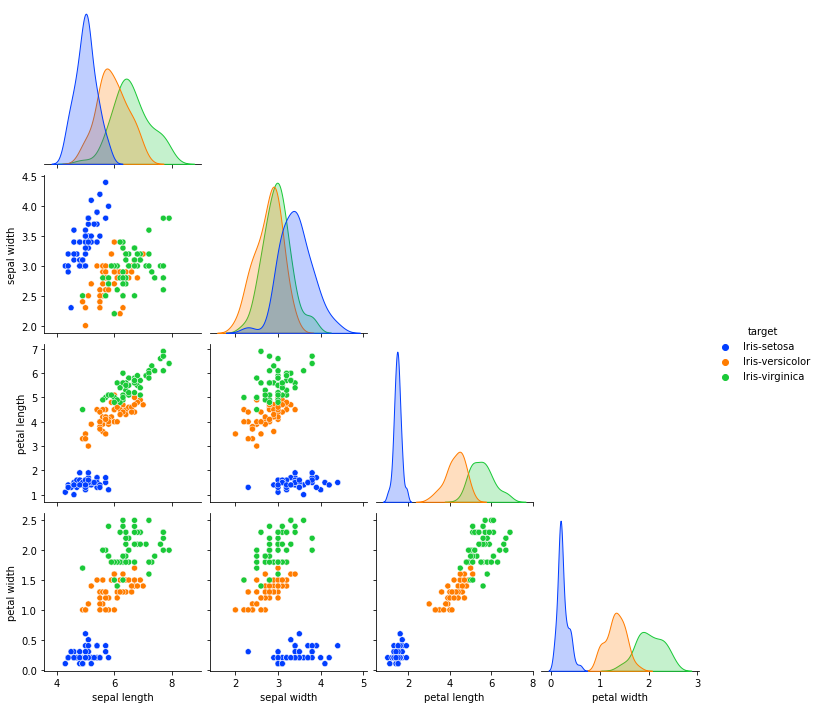

In [9]:
#원본데이터 시각화
sns.pairplot(iris.drop(columns=['cluster']),
             diag_kind='kde',
             hue='target',
             corner=True,
             palette='bright')

plt.show()

혼합분포 군집분석

In [10]:
import sklearn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

iris = pd.read_csv('iris.csv')
df = iris.drop('target',axis=1)

#데이터스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#가우시안 혼합모델 구축
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)
gmm_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [12]:
df['gmm_cluster'] = gmm_labels

#군집의 변수별 통계량 확인
cluster = [0,1,2]
df.groupby('gmm_cluster').mean()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,5.006000,3.418000,1.464000,0.244000
1,5.904444,2.775556,4.193333,1.293333
2,6.554545,2.950909,5.489091,1.989091


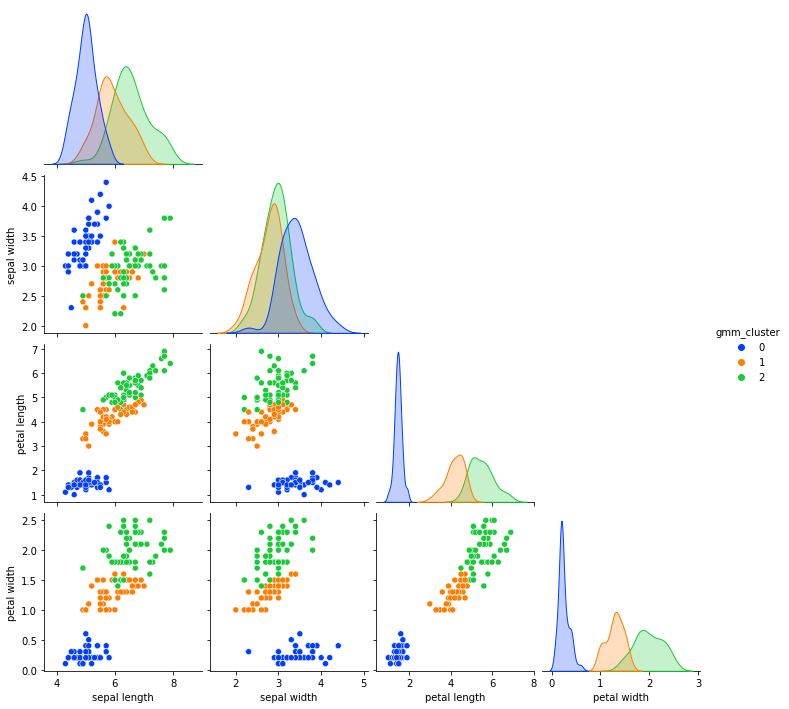

In [13]:
sns.pairplot(df,
             diag_kind = 'kde',
             hue='gmm_cluster',
             corner=True,
             palette = 'bright')

plt.show()